In [207]:
# Import all required libraries

import pandas as pd 
from glob import glob
import pylab as pl
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBClassifier
from scipy.stats import chi2_contingency
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

In [2]:
# We need a list containing all of the columns we'll use for our model

filtered_columns =  ['Crash_Sev_ID',
 'Schl_Bus_Fl',
 'Rr_Relat_Fl',
 'Active_School_Zone_Fl',
 'Crash_Date',
 'Crash_Time',
 'Toll_Road_Fl',
 'Crash_Speed_Limit',
 'Road_Constr_Zone_Fl',
 'Road_Constr_Zone_Wrkr_Fl',
 'At_Intrsct_Fl',
 'Wthr_Cond_ID',
 'Light_Cond_ID',
 'Road_Algn_ID',
 'Surf_Cond_ID',
 'FHE_Collsn_ID',
 'Obj_Struck_ID',
 'Othr_Factr_ID',
 'Road_Part_Adj_ID',
 'Road_Cls_ID',
 'Phys_Featr_1_ID',
 'Phys_Featr_2_ID',
 'Pop_Group_ID',
 'Day_of_Week']

In [3]:
# We also need a list of just the predictor columns

predictor_columns =  [
 'Schl_Bus_Fl',
 'Rr_Relat_Fl',
 'Active_School_Zone_Fl',
 'Crash_Date',
 'Crash_Time',
 'Toll_Road_Fl',
 'Crash_Speed_Limit',
 'Road_Constr_Zone_Fl',
 'Road_Constr_Zone_Wrkr_Fl',
 'At_Intrsct_Fl',
 'Wthr_Cond_ID',
 'Light_Cond_ID',
 'Road_Algn_ID',
 'Surf_Cond_ID',
 'FHE_Collsn_ID',
 'Obj_Struck_ID',
 'Othr_Factr_ID',
 'Road_Part_Adj_ID',
 'Road_Cls_ID',
 'Phys_Featr_1_ID',
 'Phys_Featr_2_ID',
 'Pop_Group_ID',
 'Day_of_Week']

In [4]:
# Import the data to a pandas data frame

root = "extract_public_2018_20200825003448226_69851_20190101-20191231Texas/"
files = glob(root + '*/*_crash_*.csv')
get_df = lambda f: pd.read_csv(f)
dfdict = {f: pd.read_csv(f) for f in files}
df = pd.concat(dfdict)
df.reset_index()

,level_0,level_1,Crash_ID,Crash_Fatal_Fl,Cmv_Involv_Fl,Schl_Bus_Fl,Rr_Relat_Fl,Medical_Advisory_Fl,Amend_Supp_Fl,Active_School_Zone_Fl,...,Nonincap_Injry_Cnt,Poss_Injry_Cnt,Non_Injry_Cnt,Unkn_Injry_Cnt,Tot_Injry_Cnt,Death_Cnt,MPO_ID,Investigat_Service_ID,Investigat_DA_ID,Investigator_Narrative
0,extract_public_2018_20200825003448226_69851_20...,0,15657177,N,N,N,N,N,Y,N,...,0,0,0,1,0,0,NaN,35.0,NaN,NaN
1,extract_public_2018_20200825003448226_69851_20...,1,16406486,N,N,N,N,N,Y,N,...,0,0,1,1,0,0,NaN,23.0,NaN,NaN
2,extract_public_2018_20200825003448226_69851_20...,2,16473665,N,N,N,N,N,Y,N,...,1,0,1,0,1,0,NaN,35.0,NaN,NaN
3,extract_public_2018_20200825003448226_69851_20...,3,16871051,N,Y,N,N,N,Y,N,...,0,0,2,0,0,0,282.0,NaN,NaN,NaN
4,extract_public_2018_20200825003448226_69851_20...,4,16995273,N,N,N,N,N,Y,N,...,0,1,6,0,1,0,15.0,53.0,61.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
648332,extract_public_2018_20200825003448226_69851_20...,54572,17777131,N,N,N,N,N,N,N,...,0,0,0,2,0,0,NaN,29.0,14.0,NaN
648333,extract_public_2018_20200825003448226_69851_20...,54573,17779640,N,N,N,N,N,N,N,...,0,0,2,0,0,0,15.0,NaN,NaN,NaN
648334,extract_public_2018_20200825003448226_69851_20...,54574,17783015,N,N,N,N,N,N,N,...,0,0,0,1,0,0,NaN,411.0,NaN,NaN
648335,extract_public_2018_20200825003448226_69851_20...,54575,17801355,N,N,N,N,N,N,N,...,0,0,1,0,0,0,15.0,NaN,NaN,NaN


In [5]:
# Filter the imported data based on our selected features.

df_filtered = df[filtered_columns]
#df_filtered = df

In [6]:
# Drop all rows where there is no crash severity ID listed. This is our target column, so these rows are useless
df_filtered = df_filtered[df_filtered.Crash_Sev_ID != 0]

In [7]:
df_filtered = df_filtered.dropna(axis=1)

In [8]:
df_filtered.shape

(609016, 26)

In [53]:
filtered_columns = df_filtered.columns.to_list()
filtered_columns

['Crash_Sev_ID',
 'Schl_Bus_Fl',
 'Rr_Relat_Fl',
 'Active_School_Zone_Fl',
 'Crash_Date',
 'Crash_Time',
 'Toll_Road_Fl',
 'Crash_Speed_Limit',
 'Road_Constr_Zone_Fl',
 'Road_Constr_Zone_Wrkr_Fl',
 'At_Intrsct_Fl',
 'Wthr_Cond_ID',
 'Light_Cond_ID',
 'Road_Algn_ID',
 'Surf_Cond_ID',
 'Intrsct_Relat_ID',
 'FHE_Collsn_ID',
 'Obj_Struck_ID',
 'Othr_Factr_ID',
 'Road_Part_Adj_ID',
 'Road_Cls_ID',
 'Road_Relat_ID',
 'Phys_Featr_1_ID',
 'Phys_Featr_2_ID',
 'Pop_Group_ID',
 'Day_of_Week']

In [29]:
predictor_columns = filtered_columns
predictor_columns.remove('Crash_Sev_ID')
predictor_columns

['Schl_Bus_Fl',
 'Rr_Relat_Fl',
 'Active_School_Zone_Fl',
 'Crash_Date',
 'Crash_Time',
 'Toll_Road_Fl',
 'Crash_Speed_Limit',
 'Road_Constr_Zone_Fl',
 'Road_Constr_Zone_Wrkr_Fl',
 'At_Intrsct_Fl',
 'Wthr_Cond_ID',
 'Light_Cond_ID',
 'Road_Algn_ID',
 'Surf_Cond_ID',
 'Intrsct_Relat_ID',
 'FHE_Collsn_ID',
 'Obj_Struck_ID',
 'Othr_Factr_ID',
 'Road_Part_Adj_ID',
 'Road_Cls_ID',
 'Road_Relat_ID',
 'Phys_Featr_1_ID',
 'Phys_Featr_2_ID',
 'Pop_Group_ID',
 'Day_of_Week']

In [31]:
df_filtered['Crash_Time'] = pd.to_datetime(df_filtered['Crash_Time']).astype('int64')
df_filtered['Crash_Date'] = pd.to_datetime(df_filtered['Crash_Date']).astype('int64')
df_filtered.Day_of_Week.replace(to_replace=r'^MON$', value=1, regex=True, inplace=True)
df_filtered.Day_of_Week.replace(to_replace=r'^TUE$', value=2, regex=True, inplace=True)
df_filtered.Day_of_Week.replace(to_replace=r'^WED$', value=3, regex=True, inplace=True)
df_filtered.Day_of_Week.replace(to_replace=r'^THU$', value=4, regex=True, inplace=True)
df_filtered.Day_of_Week.replace(to_replace=r'^FRI$', value=5, regex=True, inplace=True)
df_filtered.Day_of_Week.replace(to_replace=r'^SAT$', value=6, regex=True, inplace=True)
df_filtered.Day_of_Week.replace(to_replace=r'^SUN$', value=7, regex=True, inplace=True)

df_filtered.replace(to_replace=r'^N$', value=0, regex=True, inplace=True)
df_filtered.replace(to_replace=r'^Y$', value=1, regex=True, inplace=True)

scaler = MinMaxScaler(feature_range=(0, 1))

for i in predictor_columns:
    values = df_filtered[i].values
    values = values.reshape((len(values), 1))

    value_name = "norm_" + i
    df_filtered[value_name] = scaler.fit_transform(values)

    df_filtered.drop(i, axis=1, inplace=True)
    df_filtered.rename(columns={value_name : i}, inplace=True)

In [33]:
count_class_1, count_class_2, count_class_3, count_class_4, count_class_5 = df_filtered.Crash_Sev_ID.value_counts()
df_class_1 = df_filtered[df_filtered['Crash_Sev_ID'] == 1]
df_class_2 = df_filtered[df_filtered['Crash_Sev_ID'] == 2]
df_class_3 = df_filtered[df_filtered['Crash_Sev_ID'] == 3]
df_class_4 = df_filtered[df_filtered['Crash_Sev_ID'] == 4]
df_class_5 = df_filtered[df_filtered['Crash_Sev_ID'] == 5]

df_class_5_under = df_class_5.sample(count_class_5)
df_class_3_under = df_class_3.sample(count_class_5)
df_class_2_under = df_class_2.sample(count_class_5)
df_class_1_under = df_class_1.sample(count_class_5)

df_test_under = pd.concat([df_class_5_under, df_class_3_under, df_class_2_under, df_class_1_under, df_class_4], axis=0)

df_class_5_over = df_class_5.sample(count_class_1, replace=True)
df_class_4_over = df_class_4.sample(count_class_1, replace=True)
df_class_3_over = df_class_3.sample(count_class_1, replace=True)
df_class_2_over = df_class_2.sample(count_class_1, replace=True)
df_class_1_over = df_class_1.sample(count_class_1, replace=True)

df_test_over = pd.concat([df_class_4_over, df_class_3_over, df_class_2_over, df_class_1_over, df_class_5], axis=0)

In [44]:
class_counts = df_filtered['Crash_Sev_ID'].value_counts()
class_weights = len(class_counts)/class_counts
resampled_df = df_filtered.sample(
    n=class_counts.max()*len(class_counts),
    weights=df_filtered['Crash_Sev_ID'].map(class_weights), 
    replace=True)

In [46]:
resampled_df['Crash_Sev_ID'].value_counts()

4    427952
3    427279
2    427038
5    426930
1    426641
Name: Crash_Sev_ID, dtype: int64

In [48]:
df_test_over['Crash_Sev_ID'].value_counts()

5    427168
4    427168
3    427168
2    427168
1    427168
Name: Crash_Sev_ID, dtype: int64

In [49]:
X = resampled_df[predictor_columns].values
y = resampled_df["Crash_Sev_ID"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)
dtc = DecisionTreeClassifier(criterion="entropy", max_depth = 50)
dtc.fit(X_train,y_train)
y_hat = dtc.predict(X_test)

In [50]:
f1_score(y_test, y_hat, average=None)

array([0.99273695, 0.96750866, 0.93164651, 0.99845949, 0.8868345 ])

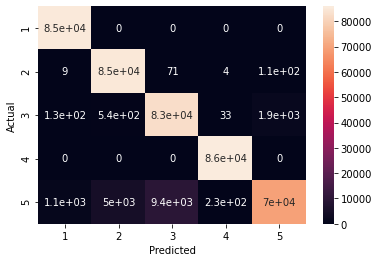

In [51]:
confusion_matrix = pd.crosstab(y_test, y_hat, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)
plt.show()

In [64]:
X = resampled_df[predictor_columns].values
y = resampled_df["Crash_Sev_ID"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

clf=RandomForestClassifier(n_estimators=100)
clf.fit(X_trainset,y_trainset)
y_hat=clf.predict(X_testset)

In [65]:
f1_score(y_test, y_hat, average=None)

array([0.9988191 , 0.98646711, 0.9507836 , 0.99981372, 0.93747283])

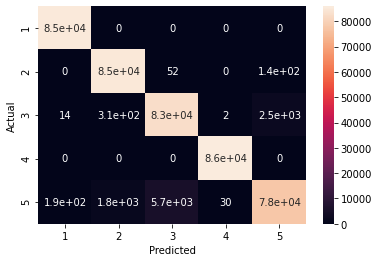

In [67]:
confusion_matrix = pd.crosstab(y_test, y_hat, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)
plt.show()

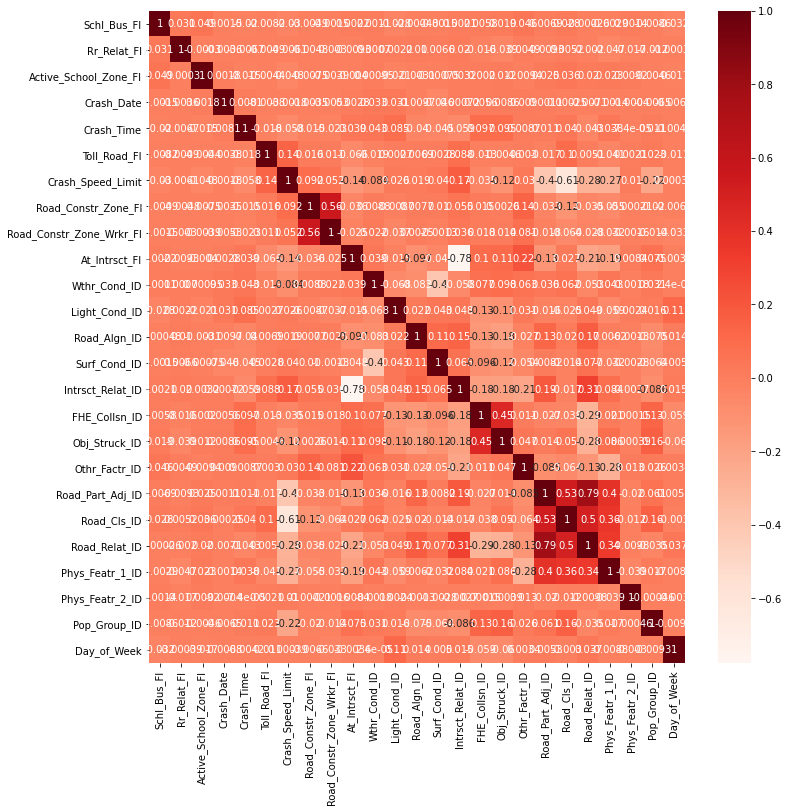

In [71]:
selected_corr = df_filtered[predictor_columns].corr()
plt.figure(figsize=(12,12))
sns.heatmap(selected_corr, annot=True, cmap=plt.cm.Reds)
plt.show()

In [72]:
highly_corrd_features = []
for i in predictor_columns:
    this_cor = abs(selected_corr[i])
    these_features = this_cor[this_cor>0.75]    
    for index, value in these_features.items():
        if value != 1:
            highly_corrd_features.append(these_features.index.to_list())
highly_corrd_features

[['At_Intrsct_Fl', 'Intrsct_Relat_ID'],
 ['At_Intrsct_Fl', 'Intrsct_Relat_ID'],
 ['Road_Part_Adj_ID', 'Road_Relat_ID'],
 ['Road_Part_Adj_ID', 'Road_Relat_ID']]

In [77]:
filtered_columns = filtered_columns.remove("Road_Relat_ID")

In [78]:
filtered_columns = filtered_columns.remove("Intrsct_Relat_ID")

AttributeError: 'NoneType' object has no attribute 'remove'

In [79]:
filtered_columns

In [80]:
new_filter = ['Crash_Time',
'Day_of_Week',
'Crash_Speed_Limit',
'FHE_Collsn_ID',
'Pop_Group_ID',
'Surf_Type_ID',
'Othr_Factr_ID',
'Obj_Struck_ID',
'Road_Cls_ID',
'Wthr_Cond_ID',
'Light_Cond_ID',
'Crash_Sev_ID']

new_predictors = ['Crash_Time',
'Day_of_Week',
'Crash_Speed_Limit',
'FHE_Collsn_ID',
'Pop_Group_ID',
'Surf_Type_ID',
'Othr_Factr_ID',
'Obj_Struck_ID',
'Road_Cls_ID',
'Wthr_Cond_ID',
'Light_Cond_ID']

In [120]:
df_filtered = df[new_filter]

In [121]:

df_filtered['Crash_Time'] = pd.to_datetime(df_filtered['Crash_Time'])


In [122]:
df_filtered['Crash_Time'] = df_filtered['Crash_Time'].dt.strftime('%H')

In [123]:
df_filtered['Crash_Time'].value_counts()

17    53168
16    50654
15    45759
18    44166
14    39355
12    38163
13    37165
07    35002
08    31967
19    30939
11    30876
10    26087
09    25116
20    24720
21    21811
06    20301
22    18550
23    14698
02    12266
00    11823
05    10666
01    10244
03     8034
04     6807
Name: Crash_Time, dtype: int64

In [145]:
df_filtered['Surf_Type_ID'].value_counts(dropna=False)

NaN    358575
4.0    124353
5.0     81694
6.0     51944
2.0     27537
3.0      4228
1.0         6
Name: Surf_Type_ID, dtype: int64

In [146]:
df_filtered['Surf_Type_ID'] = df_filtered['Surf_Type_ID'].fillna(0)

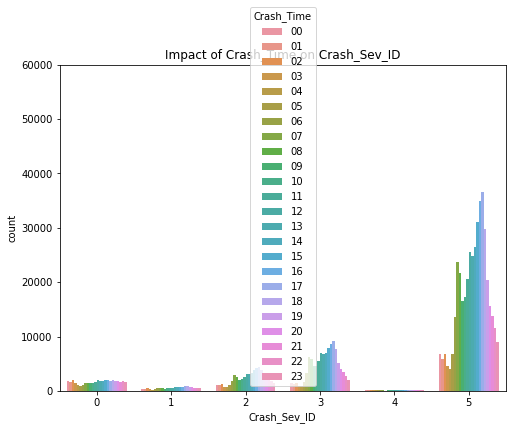

In [125]:
fig, ax=plt.subplots(figsize=(8,6))
sns.countplot(x='Crash_Sev_ID', data=df_filtered, hue='Crash_Time')
ax.set_ylim(0,60000)
plt.title("Impact of Crash_Time on Crash_Sev_ID")
plt.show()

In [83]:
#df_filtered['Crash_Time'] = pd.to_datetime(df_filtered['Crash_Time']).astype('int64')
#df_filtered['Crash_Date'] = pd.to_datetime(df_filtered['Crash_Date']).astype('int64')
df_filtered.Day_of_Week.replace(to_replace=r'^MON$', value=1, regex=True, inplace=True)
df_filtered.Day_of_Week.replace(to_replace=r'^TUE$', value=2, regex=True, inplace=True)
df_filtered.Day_of_Week.replace(to_replace=r'^WED$', value=3, regex=True, inplace=True)
df_filtered.Day_of_Week.replace(to_replace=r'^THU$', value=4, regex=True, inplace=True)
df_filtered.Day_of_Week.replace(to_replace=r'^FRI$', value=5, regex=True, inplace=True)
df_filtered.Day_of_Week.replace(to_replace=r'^SAT$', value=6, regex=True, inplace=True)
df_filtered.Day_of_Week.replace(to_replace=r'^SUN$', value=7, regex=True, inplace=True)

df_filtered.replace(to_replace=r'^N$', value=0, regex=True, inplace=True)
df_filtered.replace(to_replace=r'^Y$', value=1, regex=True, inplace=True)

scaler = MinMaxScaler(feature_range=(0, 1))

for i in new_predictors:
    values = df_filtered[i].values
    values = values.reshape((len(values), 1))

    value_name = "norm_" + i
    df_filtered[value_name] = scaler.fit_transform(values)

    df_filtered.drop(i, axis=1, inplace=True)
    df_filtered.rename(columns={value_name : i}, inplace=True)

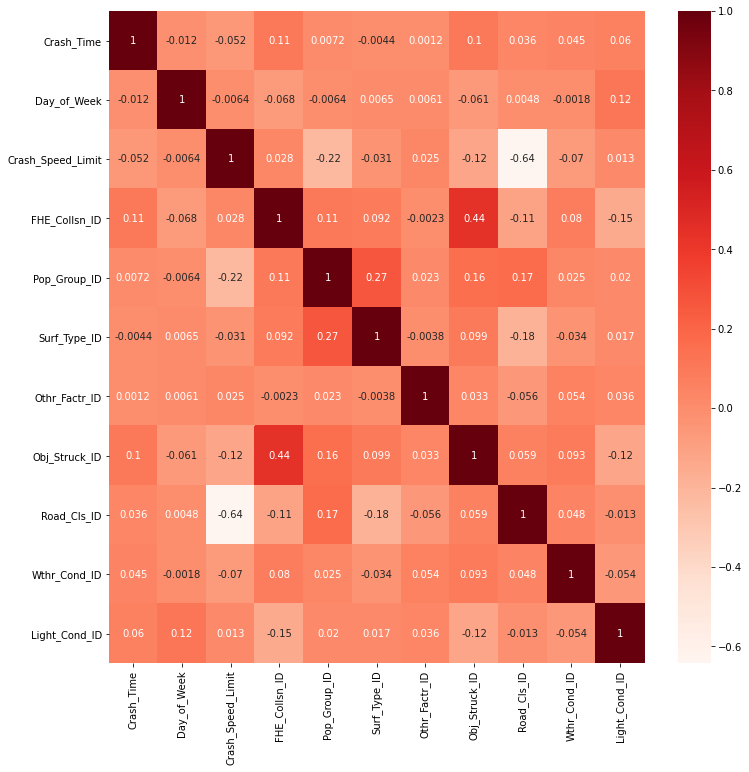

In [84]:
selected_corr = df_filtered[new_predictors].corr()
plt.figure(figsize=(12,12))
sns.heatmap(selected_corr, annot=True, cmap=plt.cm.Reds)
plt.show()

In [87]:
for i in new_predictors:
    csq=chi2_contingency(pd.crosstab(df_filtered['Crash_Sev_ID'], df_filtered[i]))
    print("P-value of " + i + ": ",csq[1])

P-value of Crash_Time:  0.0
P-value of Day_of_Week:  0.0
P-value of Crash_Speed_Limit:  0.0
P-value of FHE_Collsn_ID:  0.0
P-value of Pop_Group_ID:  0.0
P-value of Surf_Type_ID:  2.6503345980137954e-284
P-value of Othr_Factr_ID:  0.0
P-value of Obj_Struck_ID:  0.0
P-value of Road_Cls_ID:  0.0
P-value of Wthr_Cond_ID:  0.0
P-value of Light_Cond_ID:  0.0


In [147]:
train, test = train_test_split(df_filtered, test_size=0.2, random_state=42, shuffle=True)

In [148]:
train = train[train.Crash_Sev_ID != 0]

In [149]:
test = test[test.Crash_Sev_ID != 0]

In [150]:
train.Day_of_Week.replace(to_replace=r'^MON$', value=1, regex=True, inplace=True)
train.Day_of_Week.replace(to_replace=r'^TUE$', value=2, regex=True, inplace=True)
train.Day_of_Week.replace(to_replace=r'^WED$', value=3, regex=True, inplace=True)
train.Day_of_Week.replace(to_replace=r'^THU$', value=4, regex=True, inplace=True)
train.Day_of_Week.replace(to_replace=r'^FRI$', value=5, regex=True, inplace=True)
train.Day_of_Week.replace(to_replace=r'^SAT$', value=6, regex=True, inplace=True)
train.Day_of_Week.replace(to_replace=r'^SUN$', value=7, regex=True, inplace=True)

train.replace(to_replace=r'^N$', value=0, regex=True, inplace=True)
train.replace(to_replace=r'^Y$', value=1, regex=True, inplace=True)

scaler = MinMaxScaler(feature_range=(0, 1))

for i in new_predictors:
    values = train[i].values
    values = values.reshape((len(values), 1))

    value_name = "norm_" + i
    train[value_name] = scaler.fit_transform(values)

    train.drop(i, axis=1, inplace=True)
    train.rename(columns={value_name : i}, inplace=True)

In [151]:
test.Day_of_Week.replace(to_replace=r'^MON$', value=1, regex=True, inplace=True)
test.Day_of_Week.replace(to_replace=r'^TUE$', value=2, regex=True, inplace=True)
test.Day_of_Week.replace(to_replace=r'^WED$', value=3, regex=True, inplace=True)
test.Day_of_Week.replace(to_replace=r'^THU$', value=4, regex=True, inplace=True)
test.Day_of_Week.replace(to_replace=r'^FRI$', value=5, regex=True, inplace=True)
test.Day_of_Week.replace(to_replace=r'^SAT$', value=6, regex=True, inplace=True)
test.Day_of_Week.replace(to_replace=r'^SUN$', value=7, regex=True, inplace=True)

test.replace(to_replace=r'^N$', value=0, regex=True, inplace=True)
test.replace(to_replace=r'^Y$', value=1, regex=True, inplace=True)

scaler = MinMaxScaler(feature_range=(0, 1))

for i in new_predictors:
    values = test[i].values
    values = values.reshape((len(values), 1))

    value_name = "norm_" + i
    test[value_name] = scaler.fit_transform(values)

    test.drop(i, axis=1, inplace=True)
    test.rename(columns={value_name : i}, inplace=True)

In [152]:
count_class_1, count_class_2, count_class_3, count_class_4, count_class_5 = train.Crash_Sev_ID.value_counts()
df_class_1 = train[train['Crash_Sev_ID'] == 1]
df_class_2 = train[train['Crash_Sev_ID'] == 2]
df_class_3 = train[train['Crash_Sev_ID'] == 3]
df_class_4 = train[train['Crash_Sev_ID'] == 4]
df_class_5 = train[train['Crash_Sev_ID'] == 5]

df_class_5_under = df_class_5.sample(count_class_5)
df_class_3_under = df_class_3.sample(count_class_5)
df_class_2_under = df_class_2.sample(count_class_5)
df_class_1_under = df_class_1.sample(count_class_5)

df_test_under = pd.concat([df_class_5_under, df_class_3_under, df_class_2_under, df_class_1_under, df_class_4], axis=0)

df_class_5_over = df_class_5.sample(count_class_1, replace=True)
df_class_4_over = df_class_4.sample(count_class_1, replace=True)
df_class_3_over = df_class_3.sample(count_class_1, replace=True)
df_class_2_over = df_class_2.sample(count_class_1, replace=True)
df_class_1_over = df_class_1.sample(count_class_1, replace=True)

df_test_over = pd.concat([df_class_4_over, df_class_3_over, df_class_2_over, df_class_1_over, df_class_5], axis=0)

In [165]:
df_test_over.shape
df_test_under['Crash_Sev_ID'].value_counts()

5    2661
4    2661
3    2661
2    2661
1    2661
Name: Crash_Sev_ID, dtype: int64

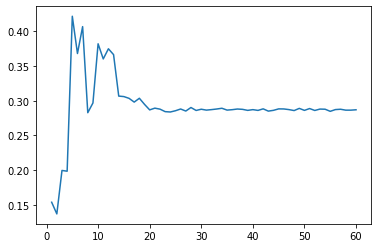

In [154]:
X_train = df_test_under[new_predictors]
y_train = df_test_under['Crash_Sev_ID']
X_test = test[new_predictors]
y_test = test['Crash_Sev_ID']

max_depths = np.linspace(1, 60, 60, endpoint=True)
train_results = []

for max_depth in max_depths:
   dt = DecisionTreeClassifier(criterion="entropy", max_depth=max_depth)
   dt.fit(X_train, y_train)
   train_pred = dt.predict(X_test)
   train_pred_score = metrics.accuracy_score(y_test, train_pred)
   train_results.append(train_pred_score)

from matplotlib.legend_handler import HandlerLine2D
line1 = plt.plot(max_depths, train_results)
plt.show()

1.0
2.0
3.0
4.0
5.0
6.0
7.0
8.0
9.0
10.0
11.0
12.0
13.0
14.0
15.0
16.0
17.0
18.0
19.0
20.0
21.0
22.0
23.0
24.0
25.0
26.0
27.0
28.0
29.0
30.0
31.0
32.0
33.0
34.0
35.0
36.0
37.0
38.0
39.0
40.0
41.0
42.0
43.0
44.0
45.0
46.0
47.0
48.0
49.0
50.0
51.0
52.0
53.0
54.0
55.0
56.0
57.0
58.0
59.0
60.0


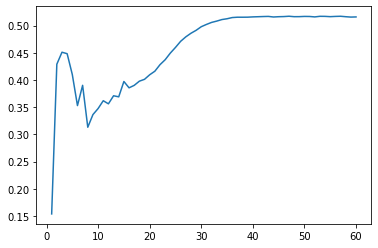

In [155]:
X_train = df_test_over[new_predictors]
y_train = df_test_over['Crash_Sev_ID']
X_test = test[new_predictors]
y_test = test['Crash_Sev_ID']

max_depths = np.linspace(1, 60, 60, endpoint=True)
train_results = []

for max_depth in max_depths:
   dt = DecisionTreeClassifier(criterion="entropy", max_depth=max_depth)
   dt.fit(X_train, y_train)
   train_pred = dt.predict(X_test)
   train_pred_score = metrics.accuracy_score(y_test, train_pred)
   train_results.append(train_pred_score)
   print(max_depth)

from matplotlib.legend_handler import HandlerLine2D
line1 = plt.plot(max_depths, train_results)
plt.show()

In [156]:
X_train = df_test_over[new_predictors]
y_train = df_test_over['Crash_Sev_ID']
X_test = test[new_predictors]
y_test = test['Crash_Sev_ID']

dtc_over = DecisionTreeClassifier(criterion="entropy", max_depth = 36)
dtc_over.fit(X_train,y_train)
y_hat = dtc_over.predict(X_test)

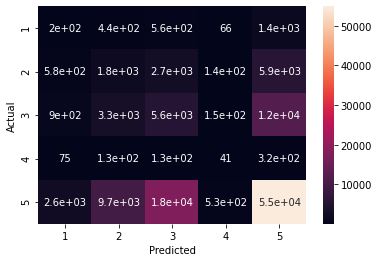

In [157]:
confusion_matrix = pd.crosstab(y_test, y_hat, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)
plt.show()

In [160]:
f1_score(y_test, y_hat, average=None)

array([0.05837527, 0.13650567, 0.23064088, 0.05064855, 0.68671654])

In [161]:
X_train = df_test_under[new_predictors]
y_train = df_test_under['Crash_Sev_ID']
X_test = test[new_predictors]
y_test = test['Crash_Sev_ID']

dtc_under = DecisionTreeClassifier(criterion="entropy", max_depth = 7)
dtc_under.fit(X_train,y_train)
y_hat = dtc_over.predict(X_test)

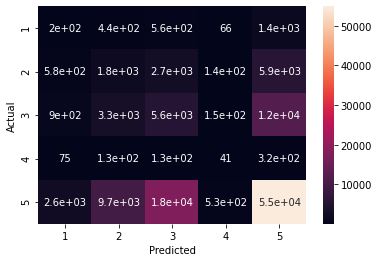

In [162]:
confusion_matrix = pd.crosstab(y_test, y_hat, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)
plt.show()

In [172]:
f1_score(y_test, y_hat, average=None)

array([0.05837527, 0.13650567, 0.23064088, 0.05064855, 0.68671654])

In [174]:
X_train = df_test_over[new_predictors]
y_train = df_test_over['Crash_Sev_ID']
X_test = test[new_predictors]
y_test = test['Crash_Sev_ID']

clf=RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)
y_hat=clf.predict(X_test)

In [175]:
f1_score(y_test, y_hat, average=None)

array([0.04992896, 0.12793608, 0.21033201, 0.06585789, 0.75756786])

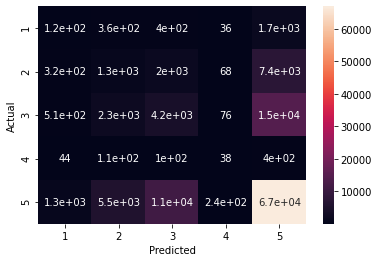

In [176]:
confusion_matrix = pd.crosstab(y_test, y_hat, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)
plt.show()

In [177]:
X_train = df_test_under[new_predictors]
y_train = df_test_under['Crash_Sev_ID']
X_test = test[new_predictors]
y_test = test['Crash_Sev_ID']

clf=RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)
y_hat=clf.predict(X_test)

In [178]:
f1_score(y_test, y_hat, average=None)

array([0.073158  , 0.14099522, 0.24860634, 0.05646536, 0.49436665])

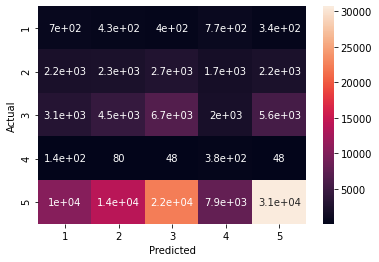

In [179]:
confusion_matrix = pd.crosstab(y_test, y_hat, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)
plt.show()

In [181]:
df_test_under

(13305, 12)

In [185]:
# We need a list containing all of the columns we'll use for our model

filtered_columns =  ['Crash_Sev_ID',
 'Schl_Bus_Fl',
 'Rr_Relat_Fl',
 'Active_School_Zone_Fl',
 'Crash_Time',
 'Crash_Date'
 'Toll_Road_Fl',
 'Crash_Speed_Limit',
 'Road_Constr_Zone_Fl',
 'Road_Constr_Zone_Wrkr_Fl',
 'At_Intrsct_Fl',
 'Wthr_Cond_ID',
 'Light_Cond_ID',
 'Road_Algn_ID',
 'Surf_Cond_ID',
 'FHE_Collsn_ID',
 'Obj_Struck_ID',
 'Othr_Factr_ID',
 'Road_Part_Adj_ID',
 'Road_Cls_ID',
 'Phys_Featr_1_ID',
 'Phys_Featr_2_ID',
 'Pop_Group_ID',
 'Day_of_Week']

In [186]:
# We also need a list of just the predictor columns

predictor_columns =  [
 'Schl_Bus_Fl',
 'Rr_Relat_Fl',
 'Active_School_Zone_Fl',
 'Crash_Time',
 'Crash_Date'
 'Toll_Road_Fl',
 'Crash_Speed_Limit',
 'Road_Constr_Zone_Fl',
 'Road_Constr_Zone_Wrkr_Fl',
 'At_Intrsct_Fl',
 'Wthr_Cond_ID',
 'Light_Cond_ID',
 'Road_Algn_ID',
 'Surf_Cond_ID',
 'FHE_Collsn_ID',
 'Obj_Struck_ID',
 'Othr_Factr_ID',
 'Road_Part_Adj_ID',
 'Road_Cls_ID',
 'Phys_Featr_1_ID',
 'Phys_Featr_2_ID',
 'Pop_Group_ID',
 'Day_of_Week']

In [184]:
df_filtered = df[filtered_columns]
df_filtered = df_filtered[df_filtered.Crash_Sev_ID != 0]

In [187]:
df_filtered['Crash_Time'] = pd.to_datetime(df_filtered['Crash_Time'])
df_filtered['Crash_Time'] = df_filtered['Crash_Time'].dt.strftime('%H')

In [188]:
df_filtered['Crash_Date'] = pd.to_datetime(df_filtered['Crash_Date']).astype('int64')

In [191]:
df_filtered.Day_of_Week.replace(to_replace=r'^MON$', value=1, regex=True, inplace=True)
df_filtered.Day_of_Week.replace(to_replace=r'^TUE$', value=2, regex=True, inplace=True)
df_filtered.Day_of_Week.replace(to_replace=r'^WED$', value=3, regex=True, inplace=True)
df_filtered.Day_of_Week.replace(to_replace=r'^THU$', value=4, regex=True, inplace=True)
df_filtered.Day_of_Week.replace(to_replace=r'^FRI$', value=5, regex=True, inplace=True)
df_filtered.Day_of_Week.replace(to_replace=r'^SAT$', value=6, regex=True, inplace=True)
df_filtered.Day_of_Week.replace(to_replace=r'^SUN$', value=7, regex=True, inplace=True)

df_filtered.replace(to_replace=r'^N$', value=0, regex=True, inplace=True)
df_filtered.replace(to_replace=r'^Y$', value=1, regex=True, inplace=True)

scaler = MinMaxScaler(feature_range=(0, 1))

for i in predictor_columns:
    values = df_filtered[i].values
    values = values.reshape((len(values), 1))

    value_name = "norm_" + i
    df_filtered[value_name] = scaler.fit_transform(values)

    df_filtered.drop(i, axis=1, inplace=True)
    df_filtered.rename(columns={value_name : i}, inplace=True)

In [192]:
train, test = train_test_split(df_filtered, test_size=0.2, random_state=42, shuffle=True)

In [197]:
class_counts = train['Crash_Sev_ID'].value_counts()
class_weights = len(class_counts)/class_counts
resampled_df = train.sample(
    n=class_counts.max()*len(class_counts),
    weights=train['Crash_Sev_ID'].map(class_weights), 
    replace=True)

In [198]:
train.Crash_Sev_ID.value_counts()

5    341752
3     87203
2     44896
1     10675
4      2686
Name: Crash_Sev_ID, dtype: int64

In [199]:
resampled_df.Crash_Sev_ID.value_counts()

4    342499
2    342224
1    341800
3    341678
5    340559
Name: Crash_Sev_ID, dtype: int64

1.0
2.0
3.0
4.0
5.0
6.0
7.0
8.0
9.0
10.0
11.0
12.0
13.0
14.0
15.0
16.0
17.0
18.0
19.0
20.0
21.0
22.0
23.0
24.0
25.0
26.0
27.0
28.0
29.0
30.0
31.0
32.0
33.0
34.0
35.0
36.0
37.0
38.0
39.0
40.0
41.0
42.0
43.0
44.0
45.0
46.0
47.0
48.0
49.0
50.0
51.0
52.0
53.0
54.0
55.0
56.0
57.0
58.0
59.0
60.0


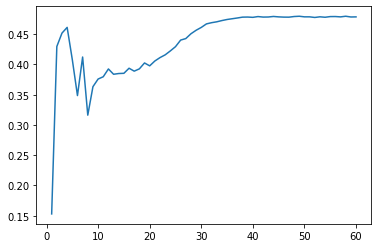

In [200]:
X_train = resampled_df[predictor_columns]
y_train = resampled_df['Crash_Sev_ID']
X_test = test[predictor_columns]
y_test = test['Crash_Sev_ID']

max_depths = np.linspace(1, 60, 60, endpoint=True)
train_results = []

for max_depth in max_depths:
   dt = DecisionTreeClassifier(criterion="entropy", max_depth=max_depth)
   dt.fit(X_train, y_train)
   train_pred = dt.predict(X_test)
   train_pred_score = metrics.accuracy_score(y_test, train_pred)
   train_results.append(train_pred_score)
   print(max_depth)

from matplotlib.legend_handler import HandlerLine2D
line1 = plt.plot(max_depths, train_results)
plt.show()

In [201]:
rfc=RandomForestClassifier(random_state=42)

In [202]:
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [205]:
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)

KeyboardInterrupt: 

In [ ]:
CV_rfc.best_params_

In [ ]:
#   rfc1=RandomForestClassifier(random_state=42, max_features='auto', n_estimators= 200, max_depth=8, criterion='gini')

In [ ]:
# rfc1.fit(X_train, y_train)

In [212]:
pca = PCA(n_components=5)
X_train = pca.fit_transform(resampled_df[predictor_columns])
y_train = resampled_df['Crash_Sev_ID']
X_test = pca.fit_transform(test[predictor_columns])
y_test = test['Crash_Sev_ID']

dt = DecisionTreeClassifier(criterion="entropy", max_depth=40)
dt.fit(X_train, y_train)
y_hat = dt.predict(X_test)

In [213]:
f1_score(y_test, y_hat, average=None)

array([0.03228303, 0.11277243, 0.22345585, 0.02055434, 0.59330358])

In [214]:
clf=RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)
y_hat=clf.predict(X_test)

In [215]:
f1_score(y_test, y_hat, average=None)

array([0.00733578, 0.04580153, 0.10354186, 0.        , 0.79455591])

In [216]:
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)

KeyboardInterrupt: 

In [ ]:
CV_rfc.best_params_